In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,layers,models
import pathlib
import PIL
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [18]:
folder='flowers\\flowers\\flowers'


In [19]:
import os
classes=[]
for i in os.listdir(folder):
    classes.append(i)

In [20]:
classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [21]:
folder_path=pathlib.Path(folder)
images=list(folder_path.glob('*/*'))
len(images)

4326

In [22]:
roses=list(folder_path.glob('rose*/*'))
len(roses)

784

In [23]:
df_train=image_dataset_from_directory(folder_path,validation_split=0.2,batch_size=32,subset='training',image_size=(180,180),seed=123)

Found 4323 files belonging to 5 classes.
Using 3459 files for training.


In [24]:
for images,labels in df_train.take(1):
    first_set=images
    print(type(images))
first_set.shape

<class 'tensorflow.python.framework.ops.EagerTensor'>


TensorShape([32, 180, 180, 3])

In [25]:
y_hat=df_train.class_names
y_hat

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [26]:
df_validation=image_dataset_from_directory(folder_path,validation_split=0.2,seed=123,batch_size=32,image_size=(180,180),subset='validation')

Found 4323 files belonging to 5 classes.
Using 864 files for validation.


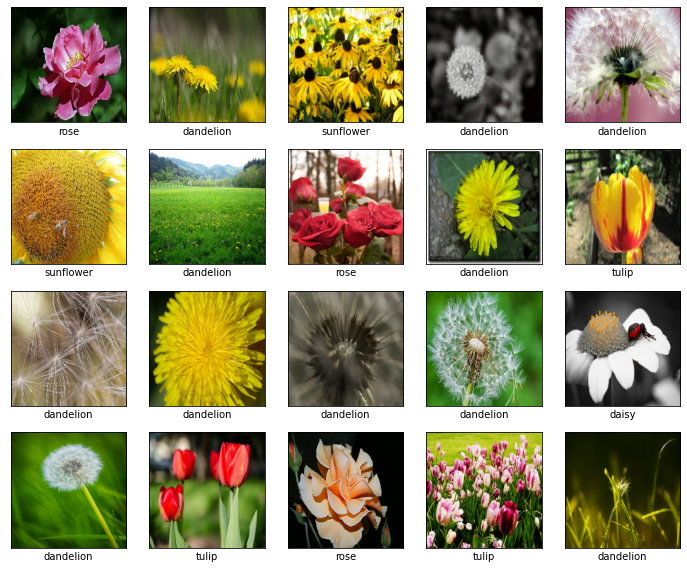

In [27]:
plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(first_set[i].numpy().astype('uint8'))
    plt.xlabel(y_hat[labels[i]])
plt.show()


In [34]:
data_augmentation=Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomFlip('vertical',input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomRotation(0.4)
])

# data_augmentation = keras.Sequential(
#     [
#         layers.experimental.preprocessing.RandomFlip("horizontal"),
#         layers.experimental.preprocessing.RandomRotation(0.5),
#     ]
# )

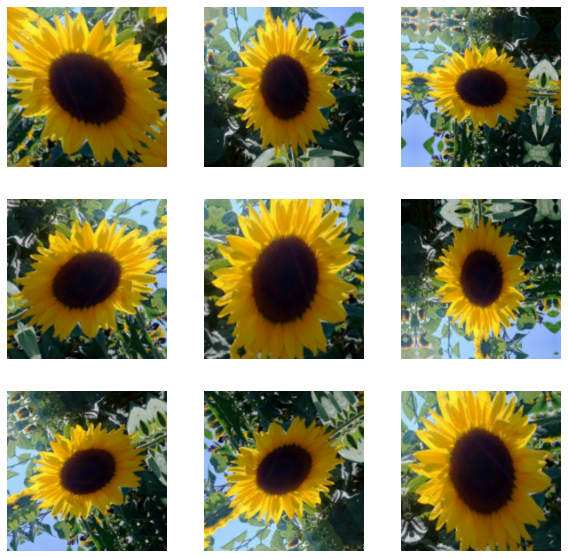

In [35]:
plt.figure(figsize=(10, 10))
for images, _ in df_train.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [36]:
model=models.Sequential([
                         data_augmentation,
                         layers.experimental.preprocessing.Rescaling(1./255),
                         layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'),
                         layers.MaxPool2D(pool_size=(2,2)),
                         layers.Dropout(0.2),
                         layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
                         layers.MaxPool2D(pool_size=(2,2)),
                         layers.Dropout(0.3),
                         layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
                         layers.MaxPool2D(pool_size=(2,2)),
                         layers.Dropout(0.2),
                         layers.Flatten(),
                         layers.Dense(units=128,activation='relu'),
                         layers.Dense(units=80,activation='relu'),
                         layers.Dense(units=5,activation='softmax')
])

In [37]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 64)       

In [38]:
model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [40]:
result=model.fit(df_train,validation_data=df_validation,epochs=10)

Epoch 1/10


C:\Users\aisha\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


109/109 [==============================] - 394s 3s/step - loss: 1.3485 - accuracy: 0.4001 - val_loss: 1.2301 - val_accuracy: 0.4155
Epoch 2/10
109/109 [==============================] - 353s 3s/step - loss: 1.1410 - accuracy: 0.5210 - val_loss: 1.0584 - val_accuracy: 0.5914
Epoch 3/10
109/109 [==============================] - 352s 3s/step - loss: 1.0630 - accuracy: 0.5640 - val_loss: 1.0722 - val_accuracy: 0.5822
Epoch 4/10
109/109 [==============================] - 291s 3s/step - loss: 1.0105 - accuracy: 0.5918 - val_loss: 0.9587 - val_accuracy: 0.6319
Epoch 5/10
109/109 [==============================] - 340s 3s/step - loss: 0.9649 - accuracy: 0.6143 - val_loss: 0.9495 - val_accuracy: 0.6238
Epoch 6/10
109/109 [==============================] - 353s 3s/step - loss: 0.9267 - accuracy: 0.6401 - val_loss: 0.9226 - val_accuracy: 0.6146
Epoch 7/10
109/109 [==============================] - 366s 3s/step - loss: 0.8986 - accuracy: 0.6499 - val_loss: 0.8419 - val_accuracy: 0.6620
Epoch 8/10

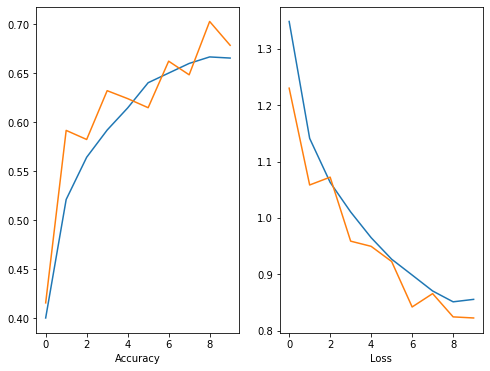

In [41]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.plot(result.history['accuracy'],label='training')
plt.plot(result.history['val_accuracy'],label='validation')
plt.xlabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(result.history['loss'],label='training')
plt.plot(result.history['val_loss'],label='validation')
plt.xlabel('Loss')

plt.show()

In [43]:
model.save('flower_clf.h5')